In [86]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier

In [87]:
df=pd.read_csv("C:\\Users\\Neel\\Desktop\\Greyatom Codes\\Datasets\\Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [88]:
df.shape

(400, 5)

In [89]:
df=df.drop(["User ID"],1)

In [90]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

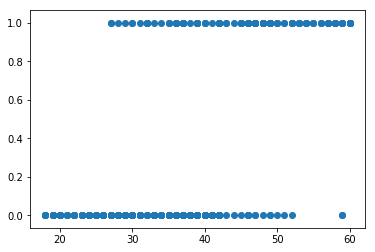

In [91]:
plt.scatter(df["Age"],df["Purchased"])
plt.show()

In [92]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [93]:
df["Gender"]=df["Gender"].astype('category')
df["Gender"]=df["Gender"].cat.codes

In [94]:
scaler=MinMaxScaler()

In [95]:
cols=list(df)

In [96]:
df1=pd.DataFrame(scaler.fit_transform(df))

In [97]:
df1.columns=cols

In [98]:
X=df1.drop(["Purchased"],1)
y=df["Purchased"]

### Logistic Regression for Understanding of Confusion Matrix

In [99]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.3,random_state=42)

In [100]:
model=LogisticRegression()

In [101]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
y_pred=model.predict(X_test)

In [103]:
confusion_matrix(y_test,y_pred)

array([[72,  1],
       [17, 30]], dtype=int64)

In [104]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89        73
           1       0.97      0.64      0.77        47

    accuracy                           0.85       120
   macro avg       0.89      0.81      0.83       120
weighted avg       0.87      0.85      0.84       120



In [105]:
accuracy_score(y_test,y_pred)

0.85

In [106]:
roc_auc_score(y_test,y_pred)

0.8122996211017196

In [107]:
y_test.value_counts()

0    73
1    47
Name: Purchased, dtype: int64

### GridSearchCV to find the Best Model of Logistic Regression

In [108]:
import numpy as np
parameters={'C':[0.001,0.01,0.1,1,10,100],'penalty':['l1','l2']}

In [109]:
log_reg=LogisticRegression()

In [110]:
log_best=GridSearchCV(log_reg,parameters,cv=10)

In [111]:
log_best.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [112]:
log_best.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [113]:
log_best.best_params_

{'C': 1, 'penalty': 'l1'}

In [114]:
log_best.best_score_

0.8275

In [115]:
y_pred=log_best.predict(X)

In [116]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       257
           1       0.84      0.72      0.78       143

    accuracy                           0.85       400
   macro avg       0.85      0.82      0.83       400
weighted avg       0.85      0.85      0.85       400



### Understanding of Validation set to check performance of GridSearchCV model for KNN and Logistic Regression

In [117]:
breast=pd.read_csv("C:\\Users\\Neel\\Desktop\\Greyatom Codes\\Datasets\\breast_cancer.csv")
breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [118]:
breast.shape

(569, 33)

In [119]:
knn_parameters={'n_neighbors':np.arange(2,12),'metric':['cosine','jaccard','manhattan','euclidean','minkowski']}

In [120]:
knn=KNeighborsClassifier()

In [121]:
breast["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [122]:
breast=breast.drop(["Unnamed: 32","id"],1)

In [123]:
breast["diagnosis"]=breast["diagnosis"].astype('category')
breast["diagnosis"]=breast["diagnosis"].cat.codes

In [124]:
b_cols=list(breast)

In [125]:
breast_scaled=pd.DataFrame(scaler.fit_transform(breast))

In [126]:
breast_scaled.columns=b_cols

In [127]:
X=breast_scaled.drop(["diagnosis"],1)
y=breast["diagnosis"]

In [128]:
knn_best=GridSearchCV(knn,knn_parameters,cv=10)

In [129]:
knn_best.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['cosine', 'jaccard', 'manhattan',
                                    'euclidean', 'minkowski'],
                         'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [130]:
knn_best.best_params_

{'metric': 'euclidean', 'n_neighbors': 11}

In [131]:
knn_best.score(X,y)

0.9806678383128296

In [132]:
y_pred=knn_best.predict(X)

In [133]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       357
           1       1.00      0.95      0.97       212

    accuracy                           0.98       569
   macro avg       0.98      0.98      0.98       569
weighted avg       0.98      0.98      0.98       569



In [134]:
roc_auc_score(y,y_pred)

0.975014534115533

In [135]:
samples=breast_scaled.sample(n=69)

In [136]:
indexes=samples.index

In [137]:
breast_scaled=breast_scaled.drop(indexes)

In [138]:
breast_scaled.shape

(500, 31)

In [139]:
X=breast_scaled.drop(["diagnosis"],1)
y=breast_scaled["diagnosis"]

In [140]:
knn_best=GridSearchCV(knn,knn_parameters,cv=10)

In [141]:
knn_best.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['cosine', 'jaccard', 'manhattan',
                                    'euclidean', 'minkowski'],
                         'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [142]:
y=samples["diagnosis"]

In [143]:
samples=samples.drop(["diagnosis"],1)

In [144]:
y_pred=knn_best.predict(samples)

In [145]:
accuracy_score(y,y_pred)

0.9565217391304348

In [146]:
logistic=LogisticRegression()

In [147]:
logistic_best=GridSearchCV(logistic,parameters,cv=10)

In [148]:
X=breast_scaled.drop(["diagnosis"],1)
y=breast_scaled["diagnosis"]

In [149]:
logistic_best.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [150]:
samples=breast_scaled.sample(n=69)

In [151]:
y=samples["diagnosis"]

In [152]:
samples=samples.drop(["diagnosis"],1)

In [153]:
y_pred=logistic_best.predict(samples)

In [154]:
accuracy_score(y,y_pred)

0.9710144927536232